In [6]:
from matplotlib import pyplot as plt
import numpy as np
import math
np.random.seed(1111111)

N = 10**6

### Generating X and Y and Calculating Z
X is a random variable with lambda=3 and Y is a random variable with lambda=4

Z is defined as X + Y

In [7]:
lambda_x,lambda_y = 3,4
X = np.random.poisson(lambda_x, N)
Y = np.random.poisson(lambda_y, N)

Z = X + Y

### Calculating $\hat{P}\big(Z)$

Finding frequency of $k$ and dividing by $N$ to get an estimate of $P(Z=k)$

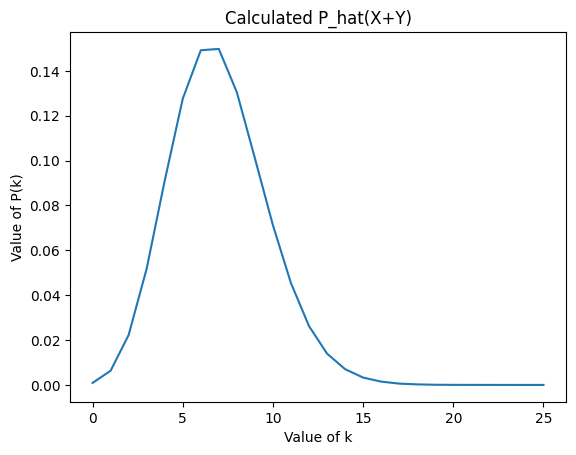

In [8]:
ind = [i for i in range(26)]
p_hat_k = [len(Z[Z==i])/len(Z) for i in ind]                # frequency of i in the array Z

name = "Calculated P_hat(X+Y)"
plt.plot(ind, p_hat_k)
plt.xlabel("Value of k")
plt.ylabel("Value of P(k)")
plt.title(name)
plt.savefig(f'../results/q2a/{name}.svg')
plt.show()

### Analytical Expression of $P(Z)$

$$P(Z=k) = \frac{e^{-\lambda_Z} \cdot \lambda_Z^k}{k!}$$

where $\lambda_Z = \lambda_X + \lambda_Y$

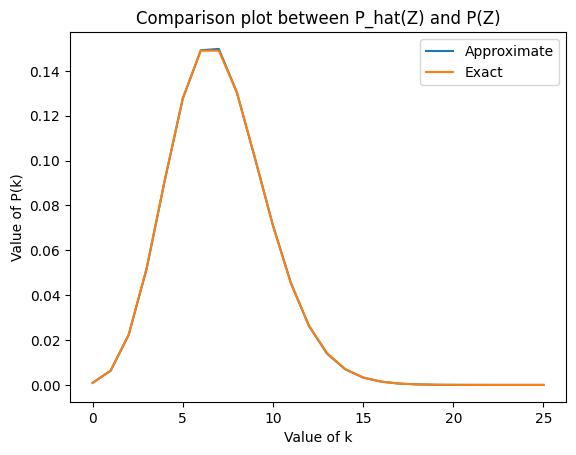

Error between approximate and exact probabilities:
For k = 0: Calculated P_hat(Z)=0.000903 and Calculated P(Z): 0.0009118819655545162, and the error is 8.881965554516195e-06
For k = 1: Calculated P_hat(Z)=0.006325 and Calculated P(Z): 0.006383173758881614, and the error is 5.8173758881613705e-05
For k = 2: Calculated P_hat(Z)=0.022276 and Calculated P(Z): 0.022341108156085646, and the error is 6.510815608564563e-05
For k = 3: Calculated P_hat(Z)=0.051859 and Calculated P(Z): 0.052129252364199845, and the error is 0.0002702523641998425
For k = 4: Calculated P_hat(Z)=0.091072 and Calculated P(Z): 0.09122619163734973, and the error is 0.00015419163734972652
For k = 5: Calculated P_hat(Z)=0.127581 and Calculated P(Z): 0.12771666829228961, and the error is 0.00013566829228961463
For k = 6: Calculated P_hat(Z)=0.149209 and Calculated P(Z): 0.1490027796743379, and the error is 0.00020622032566211534
For k = 7: Calculated P_hat(Z)=0.149799 and Calculated P(Z): 0.1490027796743379, and the error

In [9]:
poisson_value = lambda k, l: np.exp(-l)*l**k/math.factorial(k)                  # defining PDF
p_z = [poisson_value(i, lambda_x+lambda_y) for i in ind]

name = "Comparison plot between P_hat(Z) and P(Z)"
plt.plot(ind, p_hat_k, label='Approximate')
plt.plot(ind, p_z, label='Exact')
plt.legend()
plt.xlabel("Value of k")
plt.ylabel("Value of P(k)")
plt.title(name)
plt.savefig(f'../results/q2a/{name}.svg')
plt.show()

print( "Error between approximate and exact probabilities:")
for i in ind:
     print(f"For k = {i}: Calculated P_hat(Z)={p_hat_k[i]} and Calculated P(Z): {p_z[i]}, and the error is {abs(p_hat_k[i] - p_z[i])}")